### IMPORTING LIBRARIES

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
#from keras.preprocessing.image import load_img, img_to_array


### MODEL BUILDING

In [39]:

#Load dataset
import pathlib
data_dir = pathlib.Path(r"C:\Users\PRAMILA\Downloads\scalograms")
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

#Read images from disk into numpy array using opencv
images_dict = {
    'normal': list(data_dir.glob('normal/*')),
    'pain': list(data_dir.glob('pain/*')),
    'yoga': list(data_dir.glob('yoga/*'))
}

labels_dict = {
    'normal': 0,
    'pain': 1,
    'yoga':2
}

#Train test split
X, y = [], []

for _name, images in images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(256,256))
        X.append(resized_img)
        y.append(labels_dict[_name])

X = np.array(X)
y = np.array(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

num_classes = 3

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(3),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(3),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=15)             

model.save('newdatascalogram.h5')


6
Epoch 1/15
1/1 [==============================] - 1s 606ms/step - loss: 1.0900 - accuracy: 0.7500
Epoch 2/15
1/1 [==============================] - 0s 34ms/step - loss: 0.9756 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 31ms/step - loss: 0.8047 - accuracy: 0.7500
Epoch 4/15
1/1 [==============================] - 0s 32ms/step - loss: 0.6805 - accuracy: 1.0000
Epoch 5/15
1/1 [==============================] - 0s 32ms/step - loss: 0.5515 - accuracy: 1.0000
Epoch 6/15
1/1 [==============================] - 0s 34ms/step - loss: 0.3991 - accuracy: 1.0000
Epoch 7/15
1/1 [==============================] - 0s 35ms/step - loss: 0.2813 - accuracy: 1.0000
Epoch 8/15
1/1 [==============================] - 0s 33ms/step - loss: 0.1837 - accuracy: 1.0000
Epoch 9/15
1/1 [==============================] - 0s 39ms/step - loss: 0.1050 - accuracy: 1.0000
Epoch 10/15
1/1 [==============================] - 0s 44ms/step - loss: 0.0655 - accuracy: 1.0000
Epoch 11/15
1/1 [=========

### MAKING PREDICTIONS

1/1 [==============================] - 0s 84ms/step
[[  819.15405  -1320.1292     -10.824229]]
--------------normal---------------


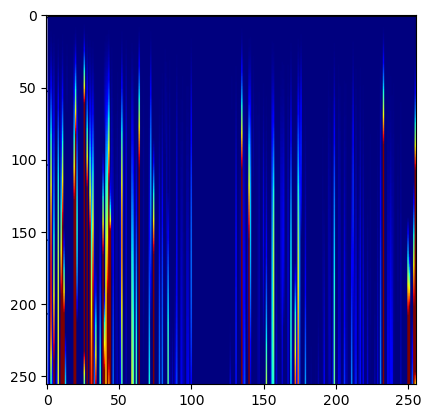

In [40]:

from tensorflow.keras.utils import load_img,img_to_array

model = tf.keras.models.load_model('newdatascalogram.h5')
img = load_img(r"C:/Users/PRAMILA/Downloads/scalograms/normal/normal1.png", target_size=(256,256)) #VGG user 224 as input
plt.imshow(img)
# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)
# Generate feature output by predicting on the input image
val = model.predict(img)
#print(val)
max_index_col = int(np.argmax(val, axis=1))   
print(val)
if max_index_col==0:
    print("--------------normal---------------")
elif max_index_col == 1:
    print("--------------pain------------------")
else:
    print("--------------yoga------------------")

1/1 [==============================] - 0s 19ms/step
[[ -163.72385 -1715.913    1127.798  ]]
--------------yoga------------------


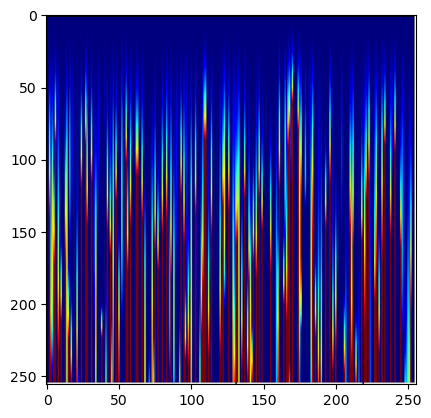

In [43]:
img = load_img(r"C:/Users/PRAMILA/Downloads/scalograms/yoga/yoga4.png", target_size=(256,256)) #VGG user 224 as input
plt.imshow(img)
# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)
# Generate feature output by predicting on the input image
val = model.predict(img)
#print(val)
max_index_col = int(np.argmax(val, axis=1))   
print(val)
if max_index_col==0:
    print("--------------normal---------------")
elif max_index_col == 1:
    print("--------------pain------------------")
else:
    print("--------------yoga------------------")

1/1 [==============================] - 0s 20ms/step
[[-572.3521   413.73282 -271.6244 ]]
--------------pain------------------


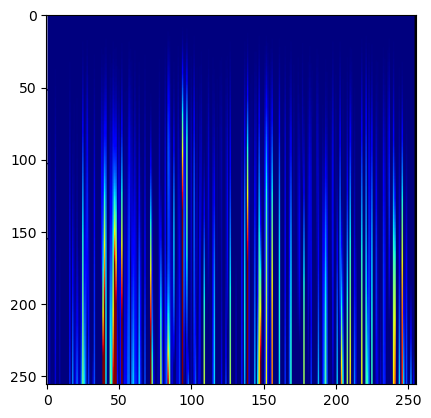

In [44]:
img = load_img(r"C:/Users/PRAMILA/Downloads/scalograms/pain/pain4.png", target_size=(256,256)) #VGG user 224 as input
plt.imshow(img)
# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)
# Generate feature output by predicting on the input image
val = model.predict(img)
#print(val)
max_index_col = int(np.argmax(val, axis=1))   
print(val)
if max_index_col==0:
    print("--------------normal---------------")
elif max_index_col == 1:
    print("--------------pain------------------")
else:
    print("--------------yoga------------------")

### FEATURE MAPPING OF IMAGES

[<KerasTensor: shape=(None, 256, 256, 16) dtype=float32 (created by layer 'conv2d_18')>, <KerasTensor: shape=(None, 85, 85, 16) dtype=float32 (created by layer 'max_pooling2d_18')>, <KerasTensor: shape=(None, 85, 85, 32) dtype=float32 (created by layer 'conv2d_19')>, <KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'max_pooling2d_19')>, <KerasTensor: shape=(None, 28, 28, 64) dtype=float32 (created by layer 'conv2d_20')>, <KerasTensor: shape=(None, 9, 9, 64) dtype=float32 (created by layer 'max_pooling2d_20')>]
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18_input (InputLayer  [(None, 256, 256, 3)]    0         
 )                                                               
                                                                 
 conv2d_18 (Conv2D)          (None, 256, 256, 16)      448       
                                                 

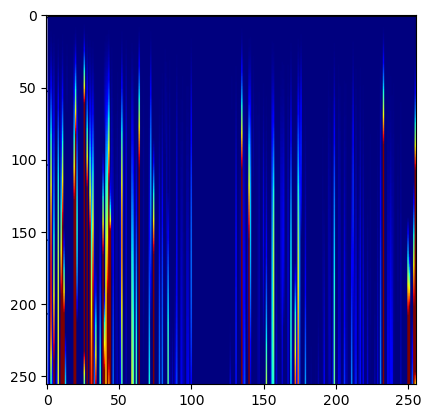

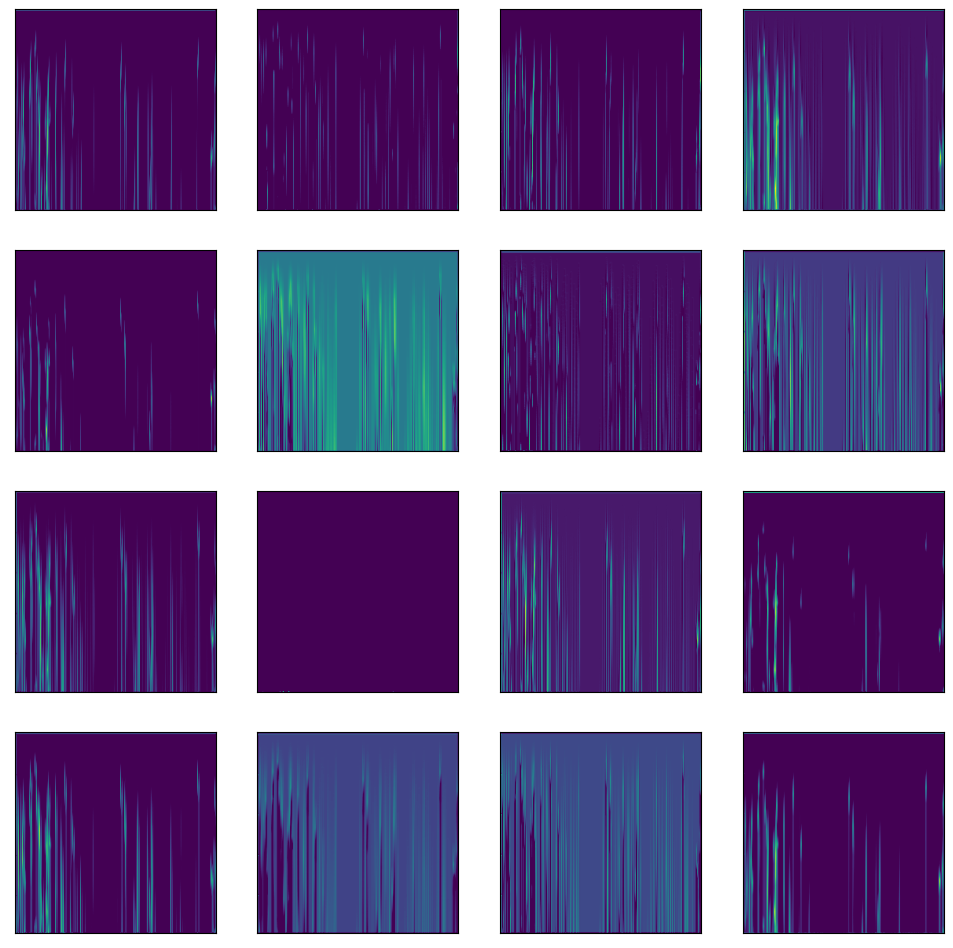

End layer
LAYER: 1


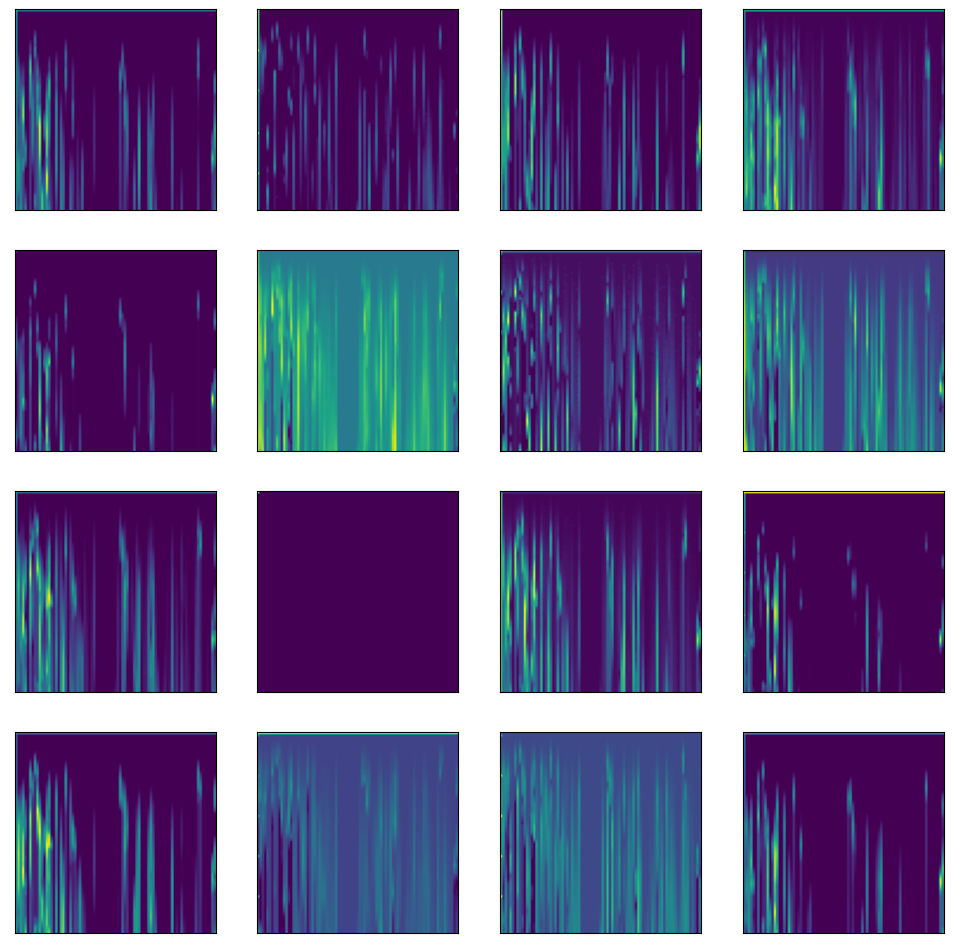

End layer
LAYER: 2


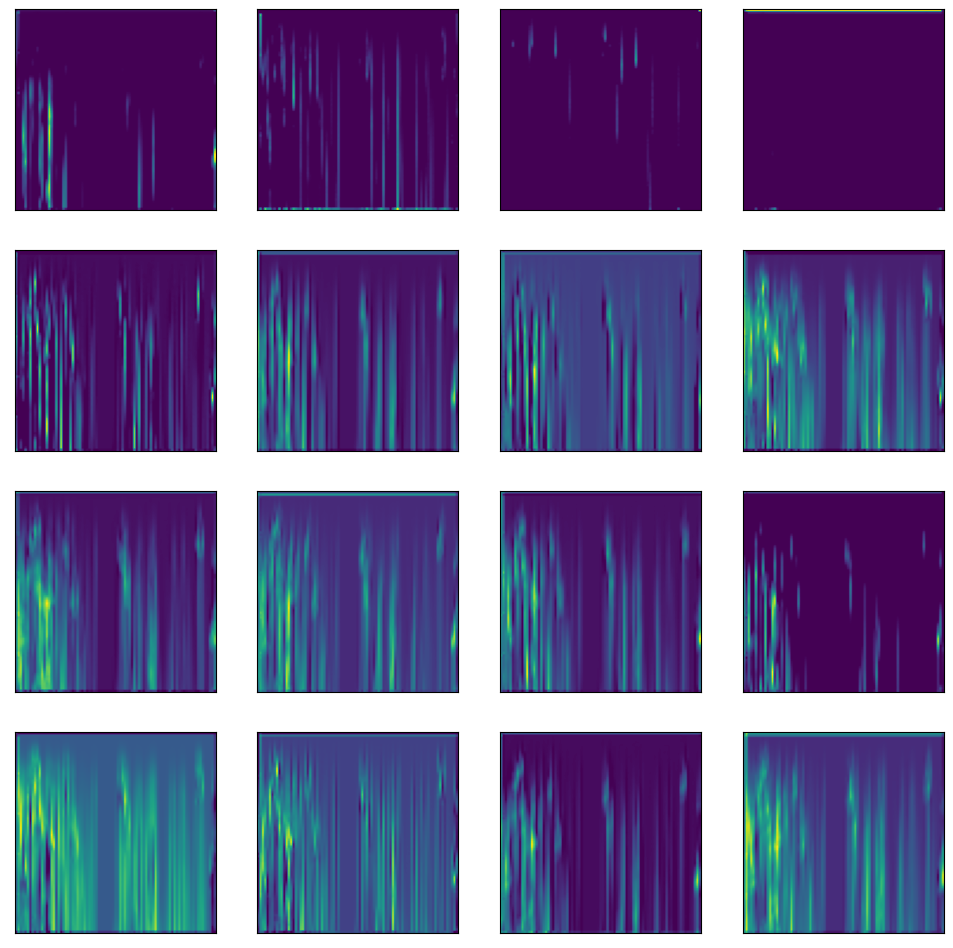

End layer
LAYER: 3


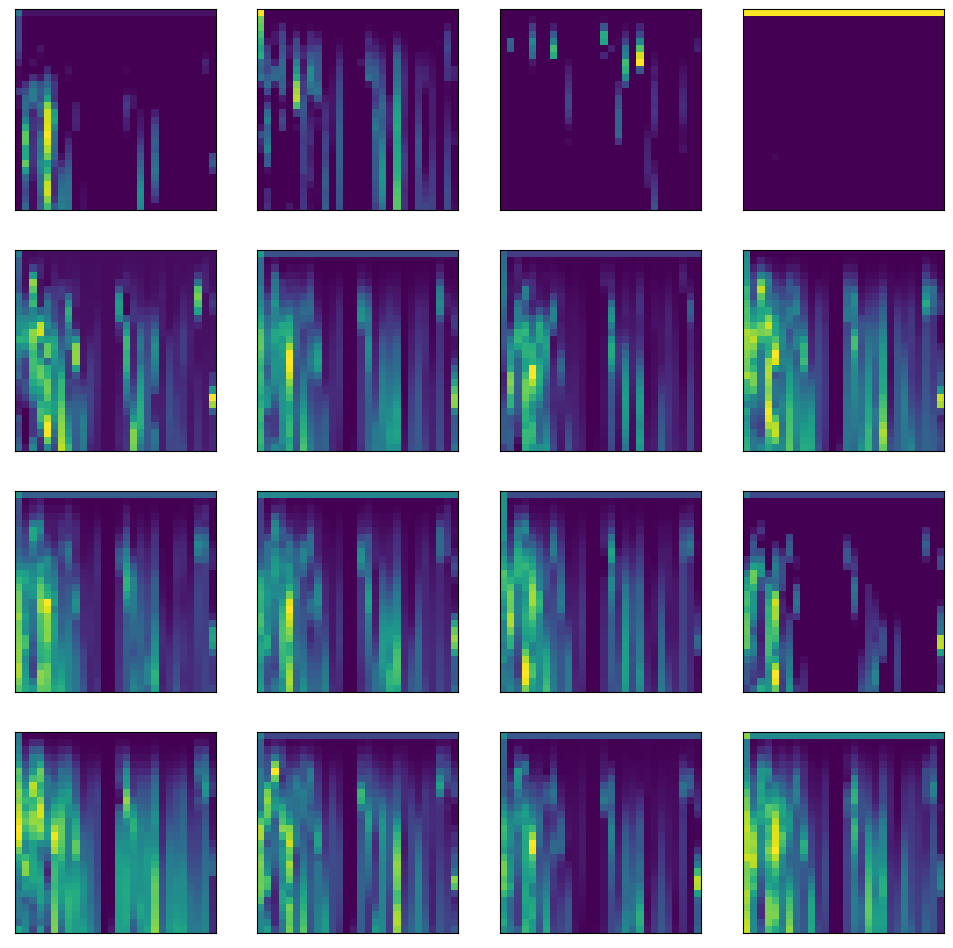

End layer
LAYER: 4


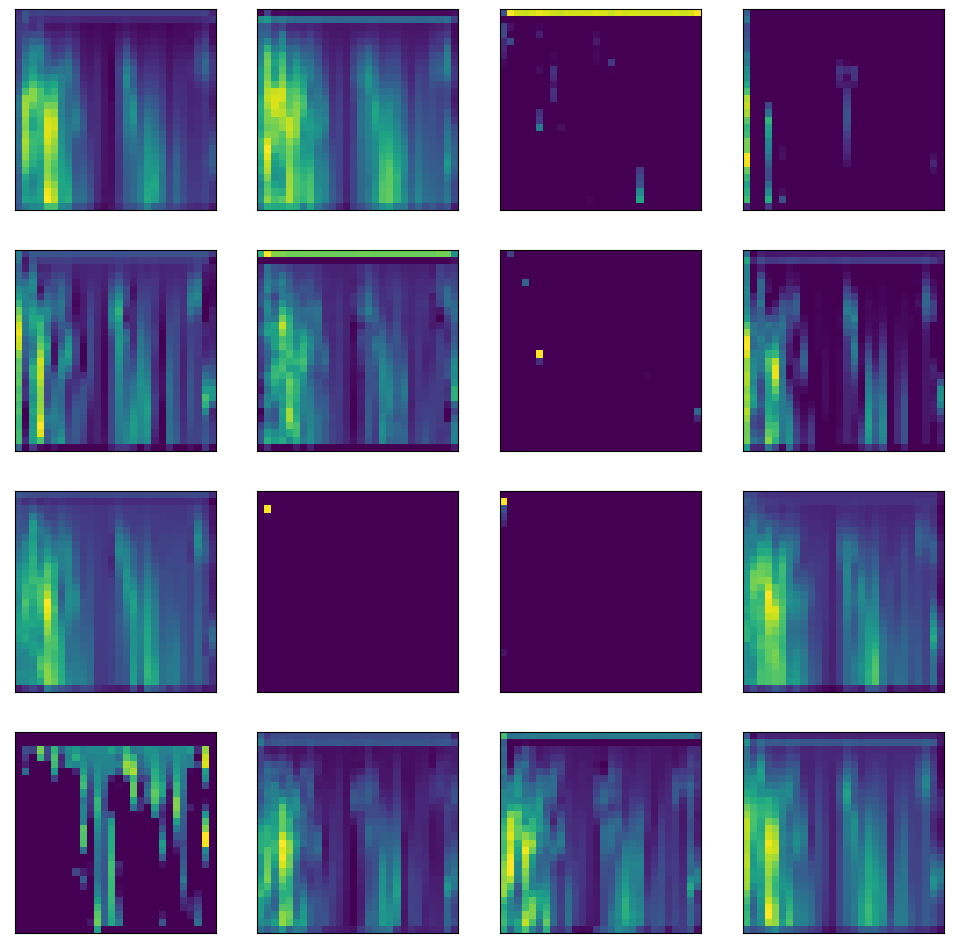

End layer
LAYER: 5


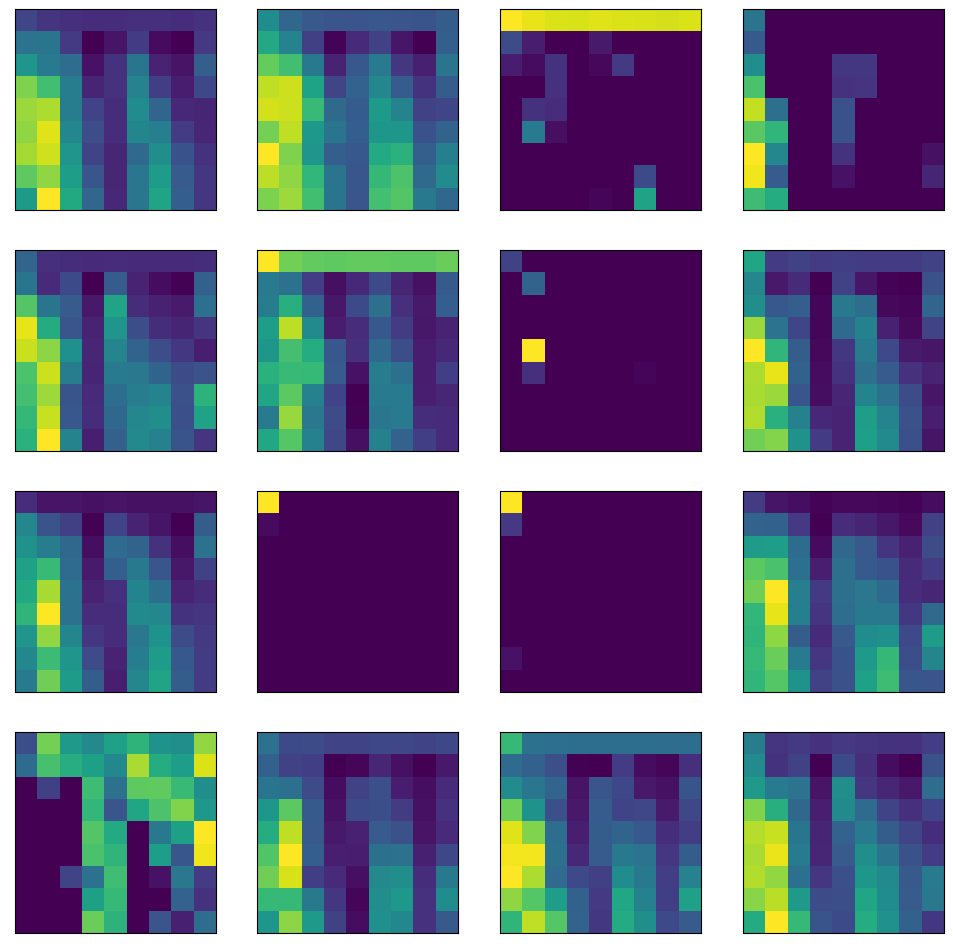

End layer


In [46]:
from keras.models import Model
conv_layer_index = [0,1,2,3,4,5]  #TO define a shorter model
outputs = [model.layers[i].output for i in conv_layer_index]
print(outputs)
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

#Input shape to the model is 224 x 224. SO resize input image to this shape.
img = load_img(r"C:/Users/PRAMILA/Downloads/scalograms/normal/normal1.png", target_size=(256,256)) #VGG user 224 as input
plt.imshow(img)
# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)

val = model.predict(img)
#print(val)
max_index_col = int(np.argmax(val, axis=1))    

    
# Generate feature output by predicting on the input image
feature_output = model_short.predict(img)
# Generate feature output by predicting on the input image
pos = 0
columns = 4
rows = 4
for ftr in feature_output:
    #pos = 1
    print("LAYER: "+str(pos))
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1],  cmap='viridis' )
        
    plt.show()
    pos += 1
    print("End layer")